Q1. Explain GET and POST methods.



### GET Method :

1. **Purpose:**
   - In Flask, the GET method is primarily used to fetch data from the server. It's used when a client requests a resource or information from the server without modifying anything on the server.
   - GET requests are typically used for retrieving HTML pages, images, JSON data, etc.

2. **Implementation in Flask:**
   - In Flask, routes are defined using the `@app.route()` decorator. By default, routes handle GET requests.
   - Parameters in GET requests are often passed through the URL's query string or as part of the route parameters.


### POST Method in Flask:

1. **Purpose:**
   - The POST method in Flask is used when the client needs to send data to the server, typically to update or create resources on the server.
   - POST requests are commonly used for form submissions, file uploads, and other operations that modify server state.

2. **Implementation in Flask:**
   - To handle POST requests in Flask, you need to specify the `methods` parameter in the `@app.route()` decorator.
   - Data sent via POST requests is usually included in the request body, not in the URL.



### Choosing Between GET and POST in Flask:

- **GET** is suitable for:
  - Fetching data from the server.
  - Requests that do not modify server state (e.g., retrieving user profiles, fetching blog posts).
  - Bookmarkable or shareable URLs.

- **POST** is suitable for:
  - Submitting data to the server (e.g., form submissions, file uploads).
  - Requests that modify server state (e.g., updating user information, creating new records).
  - Sending sensitive information like passwords.



Q2. Why is request used in Flask?

In Flask, the `request` object is used to access incoming request data submitted by a client (e.g., a web browser) when interacting with a Flask application. It provides convenient access to various components of an HTTP request, allowing developers to handle and process data sent from clients effectively. Here are the key reasons why the `request` object is essential in Flask:

### 1. Handling Form Data:

- **Purpose:** When a client submits an HTML form via a POST request, the form data is typically sent to the server. The `request` object in Flask allows you to access this form data for processing.

- **Usage Example:**
  ```python
  from flask import Flask, request

  app = Flask(__name__)

  @app.route('/submit', methods=['POST'])
  def submit_form():
      username = request.form.get('username')
      password = request.form.get('password')
      # Process username and password
      return 'Form submitted successfully!'
  ```

### 2. Query Parameters:

- **Purpose:** When a client sends data via a GET request, query parameters are included in the URL. The `request` object allows you to retrieve these parameters.

- **Usage Example:**
  ```python
  from flask import Flask, request

  app = Flask(__name__)

  @app.route('/search', methods=['GET'])
  def search():
      query = request.args.get('q')
      # Perform search based on query parameter
      return f'Search results for: {query}'
  ```

### 3. Accessing Headers:

- **Purpose:** HTTP headers contain additional information about the request. The `request` object in Flask provides access to request headers, allowing you to read and process them as needed.

- **Usage Example:**
  ```python
  from flask import Flask, request

  app = Flask(__name__)

  @app.route('/headers', methods=['GET'])
  def show_headers():
      user_agent = request.headers.get('User-Agent')
      return f'User-Agent: {user_agent}'
  ```

### 4. File Uploads:

- **Purpose:** When handling file uploads from clients (e.g., images, documents), the `request` object allows you to access and save these uploaded files.

- **Usage Example:**
  ```python
  from flask import Flask, request

  app = Flask(__name__)

  @app.route('/upload', methods=['POST'])
  def upload_file():
      uploaded_file = request.files['file']
      # Save the uploaded file to disk or process it
      return 'File uploaded successfully!'
  ```

### 5. Cookies and Sessions:

- **Purpose:** The `request` object in Flask provides access to client cookies and session data, allowing you to manage user sessions and store information between requests.

- **Usage Example:**
  ```python
  from flask import Flask, request

  app = Flask(__name__)

  @app.route('/login', methods=['POST'])
  def login():
      username = request.form.get('username')
      # Validate username and set session cookie
      # Example: session['username'] = username
      return 'Logged in successfully!'
  ```

Q3. Why is redirect() used in Flask?

In Flask, the `redirect()` function is used to perform URL redirections, which is crucial for managing the flow of web applications. It allows developers to direct users to a different URL or route within the application, typically after handling a form submission, authentication, or any other processing that requires a change in the user's current page or state. Here are the key reasons why `redirect()` is used in Flask:

### 1. Handling Form Submissions:

- **Purpose:** After processing form data submitted by a user, such as logging in or submitting a registration form, it's common to redirect the user to a different page to display a success message or to a dashboard.

- **Usage Example:**
  ```python
  from flask import Flask, redirect, url_for, request

  app = Flask(__name__)

  @app.route('/login', methods=['POST'])
  def login():
      # Process form data and authenticate user
      username = request.form['username']
      # Assuming authentication succeeds, redirect to dashboard
      return redirect(url_for('dashboard'))
  
  @app.route('/dashboard')
  def dashboard():
      return 'Welcome to the dashboard!'
  ```

### 2. Handling Authentication and Authorization:

- **Purpose:** After a successful login or authentication check, redirecting the user to a secured area of the application (e.g., user dashboard, account settings) is common practice.

- **Usage Example:**
  ```python
  from flask import Flask, redirect, url_for, request

  app = Flask(__name__)

  @app.route('/login', methods=['POST'])
  def login():
      # Process form data and authenticate user
      username = request.form['username']
      # Assuming authentication succeeds, redirect to user's profile
      return redirect(url_for('user_profile', username=username))
  
  @app.route('/profile/<username>')
  def user_profile(username):
      return f'Welcome, {username}!'
  ```

### 3. Simplifying URL Navigation:

- **Purpose:** Redirection helps simplify URL navigation by allowing developers to define a single point of truth for a particular resource or functionality. This improves maintainability and user experience by ensuring consistent URLs.

- **Usage Example:**
  ```python
  from flask import Flask, redirect, url_for

  app = Flask(__name__)

  @app.route('/')
  def index():
      # Redirect to the main page or home
      return redirect(url_for('home'))

  @app.route('/home')
  def home():
      return 'Welcome to the home page!'
  ```

### 4. Handling Errors and Exceptions:

- **Purpose:** Redirecting users to error pages or alternative routes when exceptions occur or when specific conditions are met helps manage application flow and provide meaningful feedback to users.

- **Usage Example:**
  ```python
  from flask import Flask, redirect, url_for

  app = Flask(__name__)

  @app.route('/admin')
  def admin():
      # Check if user is authorized as admin
      if not current_user.is_admin:
          return redirect(url_for('login'))  # Redirect unauthorized users to login page
      # Admin-specific logic
      return 'Welcome, Admin!'
  ```


Q4. What are templates in Flask? Why is the render_template() function used?



### What are Templates in Flask?

1. **Purpose:**
   - Templates in Flask serve as the "View" component of the MVC architecture, responsible for rendering HTML pages dynamically based on data provided by the application.
   - They allow developers to create reusable HTML structures with placeholders (template tags) that are filled in with dynamic data during runtime.

2. **Features:**
   - **Template Engines:** Flask uses Jinja2 as its default template engine, which provides powerful features like template inheritance, conditional statements, loops, and filters.
   - **Structure and Styling:** Templates include HTML markup, CSS styles, and placeholders for dynamic content using template tags enclosed in `{% ... %}` or `{{ ... }}`.

3. **Example Template (HTML file using Jinja2):**
   ```html
   <!-- template.html -->
   <!DOCTYPE html>
   <html>
   <head>
       <title>{{ title }}</title>
   </head>
   <body>
       <h1>Hello, {{ username }}!</h1>
       <p>Today's date is {{ today }}</p>
   </body>
   </html>
   ```

### Why is `render_template()` Function Used in Flask?

1. **Purpose:**
   - The `render_template()` function in Flask is used to render HTML templates and return them as a response to the client's request.
   - It integrates Flask's routing system with Jinja2 templates, allowing developers to pass data from Python code to HTML templates dynamically.

2. **Usage:**
   - Developers use `render_template()` to render specific HTML templates along with dynamic data (variables) that are passed as arguments to the function.

3. **Example Usage:**
   ```python
   from flask import Flask, render_template

   app = Flask(__name__)

   @app.route('/')
   def index():
       title = 'Home Page'
       username = 'Alice'
       today = '2024-07-15'
       return render_template('template.html', title=title, username=username, today=today)
   ```

4. **Key Benefits:**
   - **Separation of Concerns:** `render_template()` helps maintain separation between business logic (Python code in Flask routes) and presentation (HTML structure in templates).
   - **Dynamic Content:** It enables the insertion of dynamic content (like variables `title`, `username`, `today` in the example) into HTML templates, enhancing the flexibility and interactivity of web applications.
   - **Code Reusability:** Templates can be reused across multiple routes and provide a consistent lotion of concerns and enabling flexible content rendering.

Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.



### Step 1: Set Up Flask

First, install Flask if you haven't already:

```bash
pip install flask
```

### Step 2: Create a Simple API

Create a new Python file named `app.py` and add the following code:

```python
from flask import Flask, jsonify, request

app = Flask(__name__)

# Sample data
users = [
    {"id": 1, "name": "John Doe", "email": "john@example.com"},
    {"id": 2, "name": "Jane Doe", "email": "jane@example.com"}
]

# Home route
@app.route('/')
def home():
    return "Welcome to the Simple API!"

# Get all users
@app.route('/users', methods=['GET'])
def get_users():
    return jsonify(users)

# Create a new user
@app.route('/users', methods=['POST'])
def create_user():
    new_user = request.json
    users.append(new_user)
    return jsonify(new_user), 201

if __name__ == '__main__':
    app.run(debug=True)
```

### Step 3: Run the Flask App

Run the Flask app by executing the following command in your terminal:

```bash
python app.py
```

The API will be available at `http://127.0.0.1:5000`.

### Step 4: Test the API Using Postman

1. **Open Postman**.
2. **Create a new request** to `GET http://127.0.0.1:5000/`.
   - This should return a welcome message.
3. **Create a new request** to `GET http://127.0.0.1:5000/users`.
   - This should return the list of users.
4. **Create a new request** to `POST http://127.0.0.1:5000/users`.
   - Set the request body to `raw` JSON and add a new user:

```json
{
    "id": 3,
    "name": "Sam Smith",
    "email": "sam@example.com"
}
```


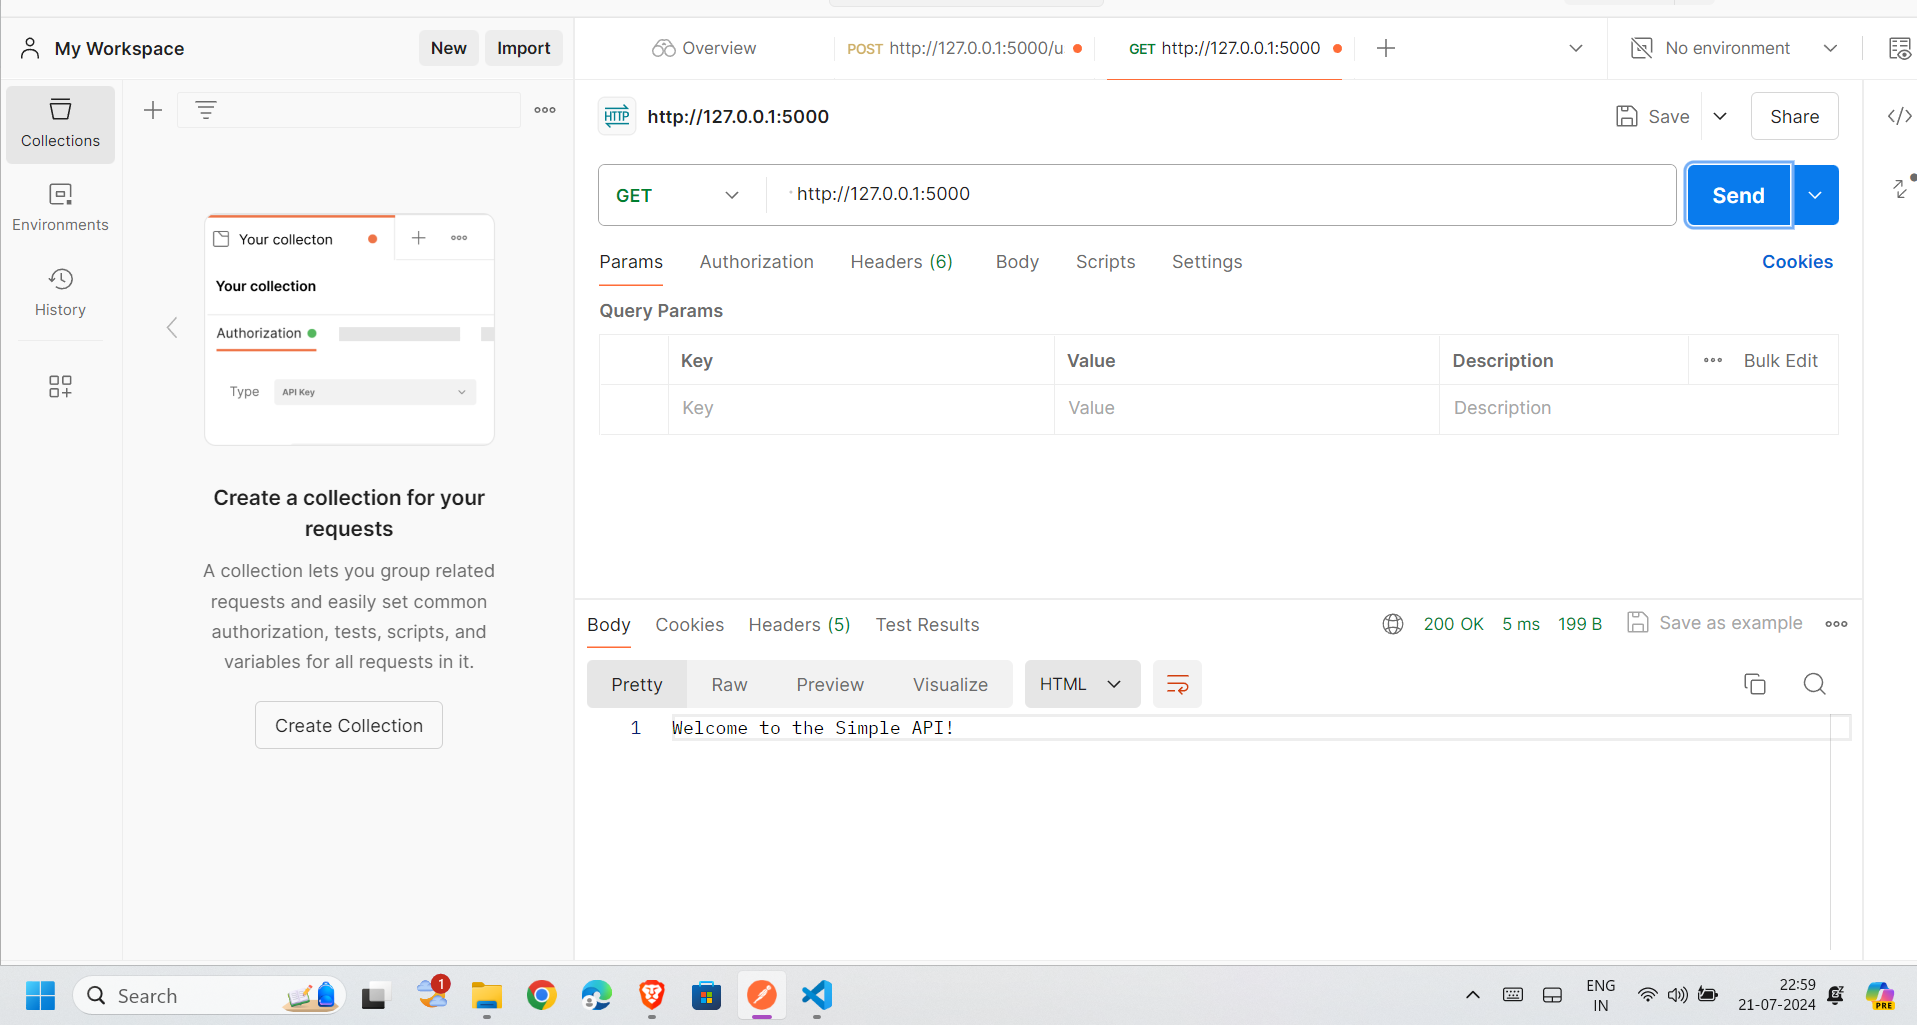

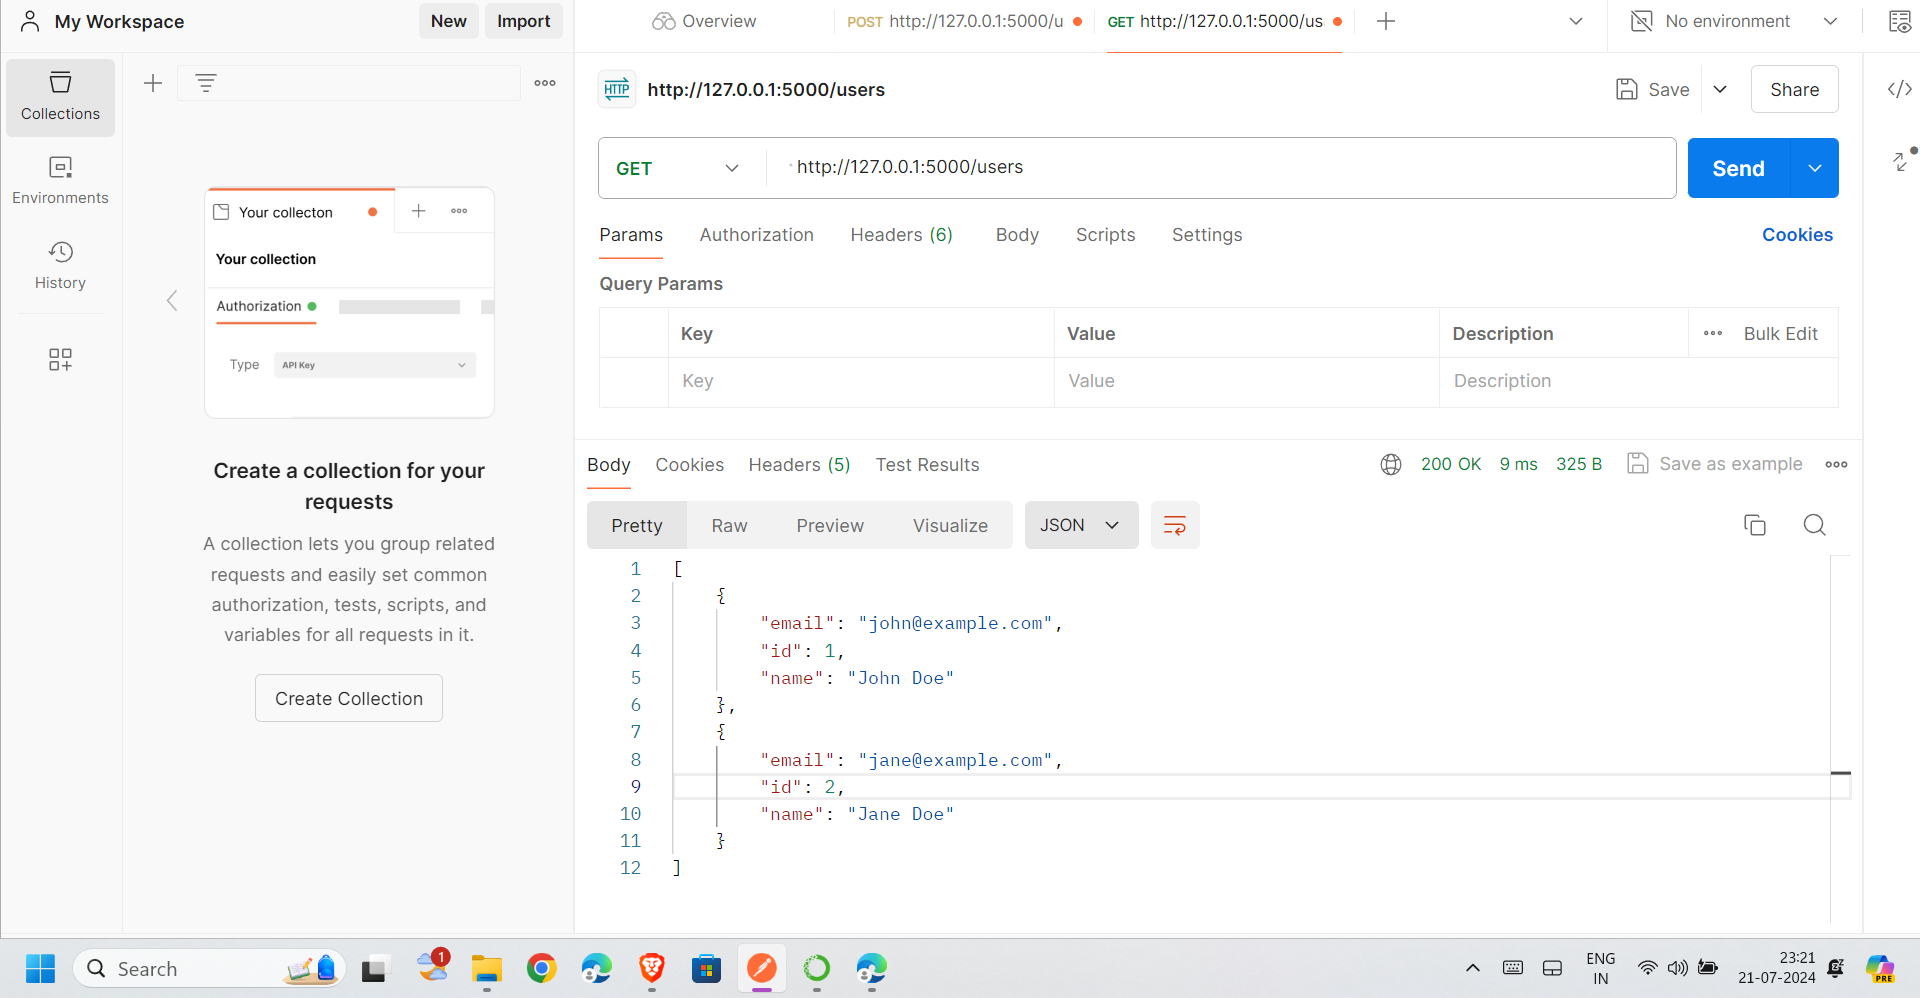